In [77]:
import pandas as pd
import os
import geopandas as gpd
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
%matplotlib inline
import numpy as np
from geopandas import GeoDataFrame
import matplotlib.pylab as plt
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
import urllib.request
import requests
import json
import io

In [23]:
#url = 'https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile'
#urllib.request.urlretrieve(url, "file.gz")
#! mv file.gz $PUIDATA
#! unzip $PUIDATA/file.gz -d $PUIDATA
#! mv geo_export_1fa6cdf9-bfb3-4564-b3b8-f39e54355d9c.shp $PUIDATA
#shape_path="/PUIDATA/geo_export_1fa6cdf9-bfb3-4564-b3b8-f39e54355d9c.shp"
#pumshp = GeoDataFrame.from_file(shape_path)
pumashp = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/geo_export_78643fe5-f173-438c-9b51-ff64df31316a.shp')
#pumashp = gpd.read_file('/geo_export_1fa6cdf9-bfb3-4564-b3b8-f39e54355d9c.shp')

In [24]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [25]:
pumashp.crs

{'init': 'epsg:4326'}

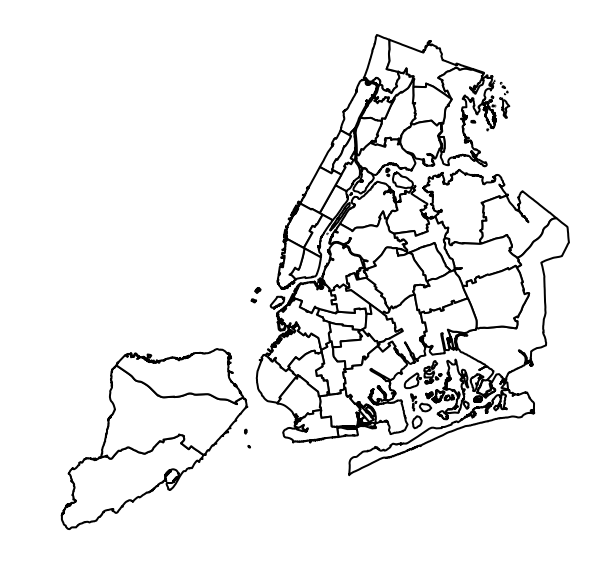

In [26]:
import choroplethNYC as cp
cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

## Figure1
This is the shape of the PUMA regions

In [42]:
myAPI = 'd9527264fbb6d27d766d9577828b6b0d6ed77a4c'

In [27]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [28]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

In [29]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL')]

In [30]:
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [31]:
#choose the fractions of houses with any "With an Internet subscription!!Broadband of any type"
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [43]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI 
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [44]:
#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [45]:
pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [46]:
#2.2
pumaBB = pumaBB.merge(pumaPP, how = 'outer')
pumaBB.drop(['Unnamed: 4'], axis = 1, inplace = True)
pumaBB['pcBB'] = (pumaBB.B28002_004E/pumaBB.B28002_001E)*100
pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,32607,"St. Lawrence County PUMA, New York",36,100,40479,80.552879
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,67092,75.733321
2,41210,"Warren & Washington Counties PUMA, New York",36,300,51614,79.842678
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,44300,81.433409
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,61146,78.150656


In [19]:
#2.3
#! curl -O https://raw.githubusercontent.com/YuchenDing/PUI2018_yd1402/master/HW7_yd1402/ACS_16_1YR_GCT2801.ST50_with_ann.csv
#! mv ACS_16_1YR_GCT2801.ST50_with_ann.csv $PUIDATA


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  433k  100  433k    0     0  3087k      0 --:--:-- --:--:-- --:--:-- 3098k


In [34]:
#url = "https://raw.githubusercontent.com/YuchenDing/PUI2018_yd1402/master/HW7_yd1402/ACS_16_1YR_GCT2801.ST50_with_ann.csv" 
#resp = requests.request('GET', url).content
#bbpc = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,Target Geo Id2,Percent,Margin of Error
1,01,74.7,0.5
2,0100100,70.9,2.5
3,0100200,80.5,2.7
4,0100301,87.0,2.8


In [35]:
bbpc.drop(0, inplace = True)
bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
1,01,74.7,0.5
2,0100100,70.9,2.5
3,0100200,80.5,2.7
4,0100301,87.0,2.8
5,0100302,81.9,2.9


In [36]:
bbpc["gid"] = bbpc['GCT_STUB.target-geo-id2'].astype(int) - 3600000

In [47]:

diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "HC01"]]

diff_["diff"] = np.abs(diff_["pcBB"] - diff_["HC01"].astype(float))

diff_.describe()

,pcBB,diff
count,145.000000,145.000000
mean,81.845478,0.026217
std,7.063369,0.014480
min,54.932945,0.000178
25%,77.770257,0.012252
50%,82.826141,0.027230
75%,87.305077,0.039090
max,93.404143,0.049872


In [48]:
#3.1
pumashp['puma'] = pumashp['puma'].astype(float)
pumashp = pumashp.merge(pumaBB, right_on="public use microdata area", left_on="puma")
pumashp.head()

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB
0,3701.0,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820
1,3702.0,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015
2,3703.0,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141
3,3704.0,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737
4,4015.0,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,55953,78.778618


Text(0.5,1,'NYC Broadband Access percentage Choropleth')

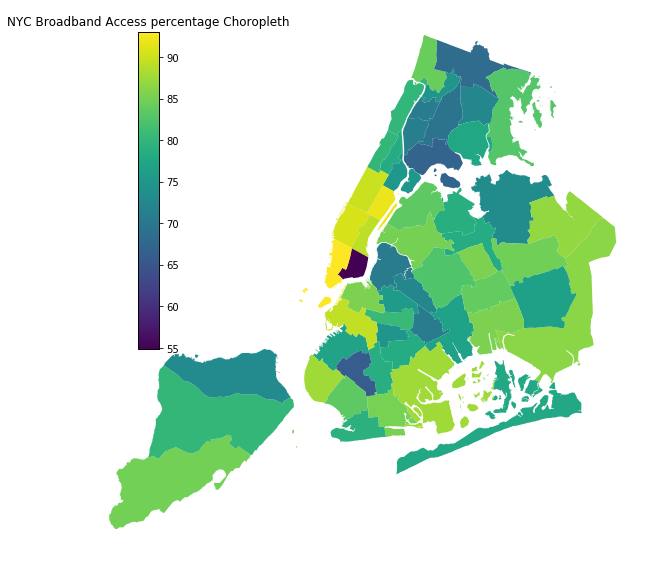

In [50]:
import pylab as pl
cp.choroplethNYC(pumashp, column='pcBB')
pl.title("NYC Broadband Access percentage Choropleth")

## Figure 2
This is the NYC Broadband Access percentage Choropleth. Broadband access in upper side of Manhattan has the maximum density

In [51]:
#4
! curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW7_fb55/linkNYClocations.csv
! mv linkNYClocations.csv $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75571  100 75571    0     0   653k      0 --:--:-- --:--:-- --:--:--  658k


In [79]:
linkNYC = pd.read_csv(os.getenv('PUIDATA')+'/linkNYClocations.csv')
linkNYC.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [80]:
linkNYC.shape

(1414, 5)

In [81]:
linkNYC.drop(['Unnamed: 0'], axis=1, inplace = True)

In [82]:
linkNYC.head()

,link_site,longitude,date_link_,latitude
0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [83]:
linkNYC.shape

(1414, 4)

In [84]:
linkNYC['lonlat'] = list(zip(linkNYC.longitude,linkNYC.latitude))
linkNYC['geometry'] = linkNYC[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [85]:
linkNYC = gpd.GeoDataFrame(linkNYC)

In [86]:
linkNYC.crs = from_epsg(4326)

In [87]:
linkNYC.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


Text(0.5,1,'linkNYC locations of Broadband Access percentage Choropleth in 5 equal intervals')

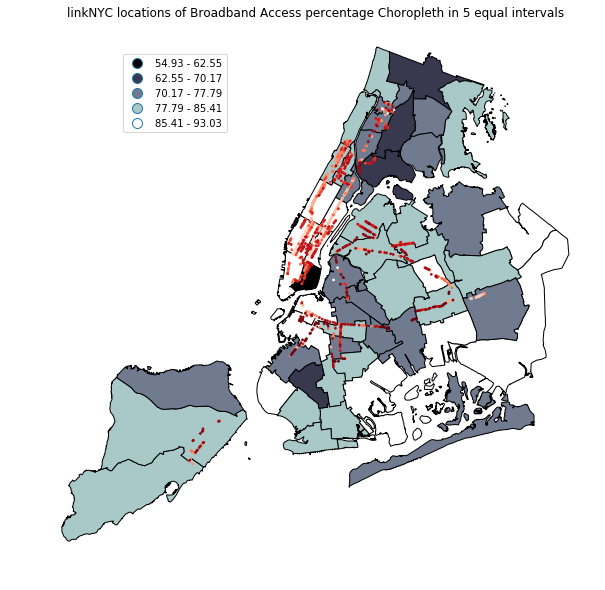

In [107]:
f, ax, cb = cp.choroplethNYC(pumashp, column='pcBB', cmap='bone', edgecolor='black', scheme="Equal_interval", k=5)
linkNYC.plot(c=linkNYC.date_link_,cmap='Reds',ax=ax, markersize=3)
pl.title("linkNYC locations of Broadband Access percentage Choropleth in 5 equal intervals")

## Figure 3
Midtown and Downtown Manhattan accounts for the majority of the linkNYC locations of Broadband Access

In [62]:
#5.1
url = "https://api.census.gov/data/2016/acs/acs1?get=B00001_001E" + \
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaPop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
pumaPop.head()

,B00001_001E,NAME,state,public use microdata area,Unnamed: 4
0,3075,"St. Lawrence County PUMA, New York",36,100,NaN
1,4356,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,2736,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,2722,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,2874,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [63]:
pumashp = pumashp.merge(pumaPop, right_on=["public use microdata area", "NAME", 'state'], left_on=["public use microdata area", "NAME", 'state'])
pumashp.drop(['Unnamed: 4'], axis=1, inplace=True)
pumashp.head()

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB,B00001_001E
0,3701.0,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820,1517
1,3702.0,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015,1959
2,3703.0,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141,1305
3,3704.0,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737,1882
4,4015.0,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,55953,78.778618,2515


In [100]:
#5.2
#convert coordinates for pumashp and linkNYC
pumashp2 = pumashp.to_crs(epsg=2263)
linkNYC2 = linkNYC.to_crs(epsg=2263)

In [103]:
linkpp = gpd.sjoin(pumashp2, linkNYC2).groupby('puma').size().to_frame()
linkpp.rename(columns={linkpp.columns[0]: "link_site" }, inplace=True)
linkpp.head()

,link_site
puma,
3701.0,1
3705.0,1
3706.0,20
3707.0,29
3708.0,19


In [105]:
linkpp = linkpp.reset_index()
pumashplc = pumashp.merge(linkpp, how='outer')
pumashplc.head()

,puma,shape_area,shape_leng,geometry,B28002_004E,NAME,state,public use microdata area,B28002_001E,pcBB,B00001_001E,index,link_site
0,3701.0,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,35529,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,42158,84.275820,1517,0.0,1.0
1,3702.0,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",34030,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,49817,68.310015,1959,NaN,NaN
2,3703.0,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,36716,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,44329,82.826141,1305,NaN,NaN
3,3704.0,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",32269,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,44476,72.553737,1882,NaN,NaN
4,4015.0,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,44079,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,55953,78.778618,2515,29.0,3.0


In [106]:
#linkNYC per 100 inhabitants
pumashplc['link_site'] = pumashplc['link_site'].fillna(0)
pumashplc['linkNYCp100p'] = (pumashplc.link_site/pumashplc.B00001_001E)*100
pumashplc['linkNYCp100p'].describe()

count    55.000000
mean      1.565892
std       2.933074
min       0.000000
25%       0.000000
50%       0.538358
75%       1.646966
max      15.141540
Name: linkNYCp100p, dtype: float64

Text(0.5,1,'linkNYC locations Per 100 Person Choropleth in 10 equal intervals')

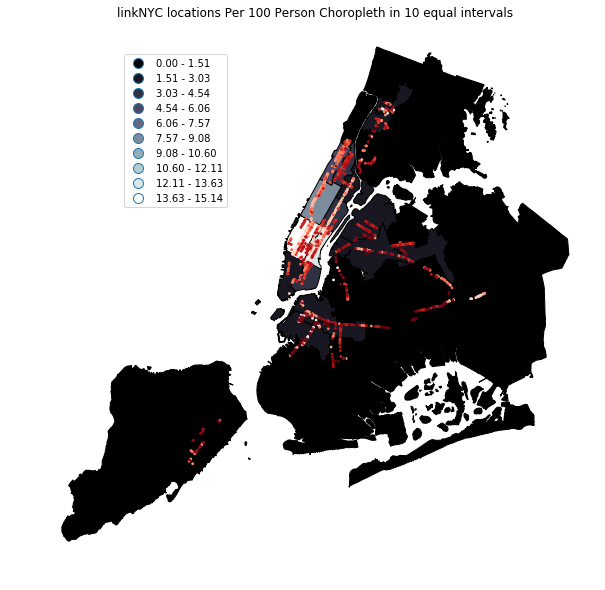

In [108]:
#plot
pumashplc.crs = from_epsg(4326)
fig, ax, cb = cp.choroplethNYC(pumashplc, column='linkNYCp100p', cmap='bone', edgecolor='black', scheme="Equal_interval", k=10)
linkNYC.plot(c=linkNYC.date_link_,cmap='Reds',ax=ax, markersize=3)
pl.title("linkNYC locations Per 100 Person Choropleth in 10 equal intervals")

## Figure 4
Manhattan and part of Brooklyn has most linkNYC stations.